**Assignment - 1**
* Submitted by - Anant Kumar Jain
* Btech A.I 
* ADV3ARI0008

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Reading DataSet CC_General.csv**

In [ ]:
Gen_df = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/CC_GENERAL.csv')

**1. Display the Dataset**

In [ ]:
display(Gen_df)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**2. Display Shape of Dataset**

In [ ]:
shape = Gen_df.shape
print('Shape of DataSet = ',shape)

Shape of DataSet =  (8950, 18)


**Size Of Dataset**

In [ ]:
size = Gen_df.size
print('Size of DataSet = ',size)

Size of DataSet =  161100


**Dimension Of Dataset**

In [ ]:
dim = Gen_df.ndim
print('Dimension of DataSet = ',dim)

Dimension of DataSet =  2


In [ ]:
inf = Gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**3. Check for Missing values & Handle it via suitable strategy**

In [ ]:
Gen_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
Gen_df['MINIMUM_PAYMENTS'].unique()

array([ 139.509787, 1072.340217,  627.284787, ...,   82.418369,
         55.755628,   88.288956])

In [ ]:
MP = len(Gen_df['MINIMUM_PAYMENTS'].unique())

In [ ]:
MP

8637

**Replacing Missing Values By Mean**

In [ ]:
Mean_val = np.round(Gen_df['MINIMUM_PAYMENTS'].mean(), 6)

In [ ]:
Mean_val

864.206542

In [ ]:
Gen_df['MINIMUM_PAYMENTS'].replace(np.nan,Mean_val, inplace = True)

In [ ]:
Gen_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        1
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
Gen_df.dropna(inplace=True)

In [ ]:
Gen_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**4. Determining Outliers and removing them**

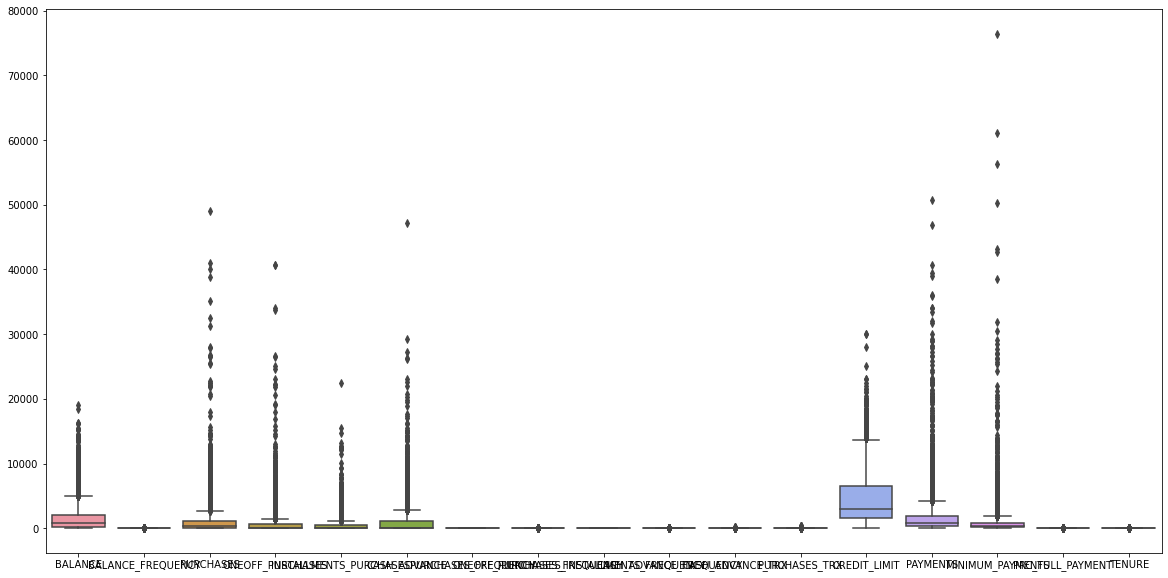

In [ ]:
plt.figure(figsize = (20,10) )
sns.boxplot(data = Gen_df)

**Outliers are to be removed in**

*   BALANCE
*   PURCHASES
*   ONEOFF_PURCHASES
*   INSTALLMENTS_PURCHASES
*   CASH_ADVANCE
*   CREDIT_LIMIT
*   PAYMENTS
*   MINIMUM_PAYMENTS









In [ ]:
 def remove_outliers(input_df) :
  q1 = input_df.quantile(0.25)
  q3 = input_df.quantile(0.75)

  iqr = q3 - q1
  min_range = q1 - 1.5 * iqr
  max_range = q3 + 1.5 * iqr

  # indexes of outliers
  
  outliers_indices = list(input_df.index[(input_df < min_range) | (input_df > max_range)])
  outliers_values = list(input_df[outliers_indices])
  count = len(outliers_values)

  print(" Min Range : %i" %min_range)
  print(" Max Range : %i" %max_range)
  print(" Total No. of Outliers = ", count)

  mean_val = np.round(np.mean([input_df]), 6)
  input_df = np.where(input_df > max_range, mean_val, input_df)

  #return outliers_indices, outliers_values (Used when to find the value & position of outliers)

In [ ]:
print(" BALANCE")
remove_outliers(Gen_df['BALANCE'])

print(" PURCHASES")
remove_outliers(Gen_df['PURCHASES'])

print(" ONEOFF_PURCHASES")
remove_outliers(Gen_df['ONEOFF_PURCHASES'])

print(" INSTALLMENTS_PURCHASES")
remove_outliers(Gen_df['INSTALLMENTS_PURCHASES'])

print(" CASH_ADVANCE")
remove_outliers(Gen_df['CASH_ADVANCE'])

print(" CREDIT_LIMIT")
remove_outliers(Gen_df['CREDIT_LIMIT'])

print(" PAYMENTS")
remove_outliers(Gen_df['PAYMENTS'])

print(" MINIMUM_PAYMENTS")
remove_outliers(Gen_df['MINIMUM_PAYMENTS'])


 BALANCE
 Min Range : -2760
 Max Range : 4943
 Total No. of Outliers =  695
 PURCHASES
 Min Range : -1565
 Max Range : 2715
 Total No. of Outliers =  808
 ONEOFF_PURCHASES
 Min Range : -866
 Max Range : 1444
 Total No. of Outliers =  1013
 INSTALLMENTS_PURCHASES
 Min Range : -702
 Max Range : 1171
 Total No. of Outliers =  867
 CASH_ADVANCE
 Min Range : -1670
 Max Range : 2784
 Total No. of Outliers =  1030
 CREDIT_LIMIT
 Min Range : -5750
 Max Range : 13850
 Total No. of Outliers =  248
 PAYMENTS
 Min Range : -1893
 Max Range : 4178
 Total No. of Outliers =  808
 MINIMUM_PAYMENTS
 Min Range : -869
 Max Range : 1904
 Total No. of Outliers =  774


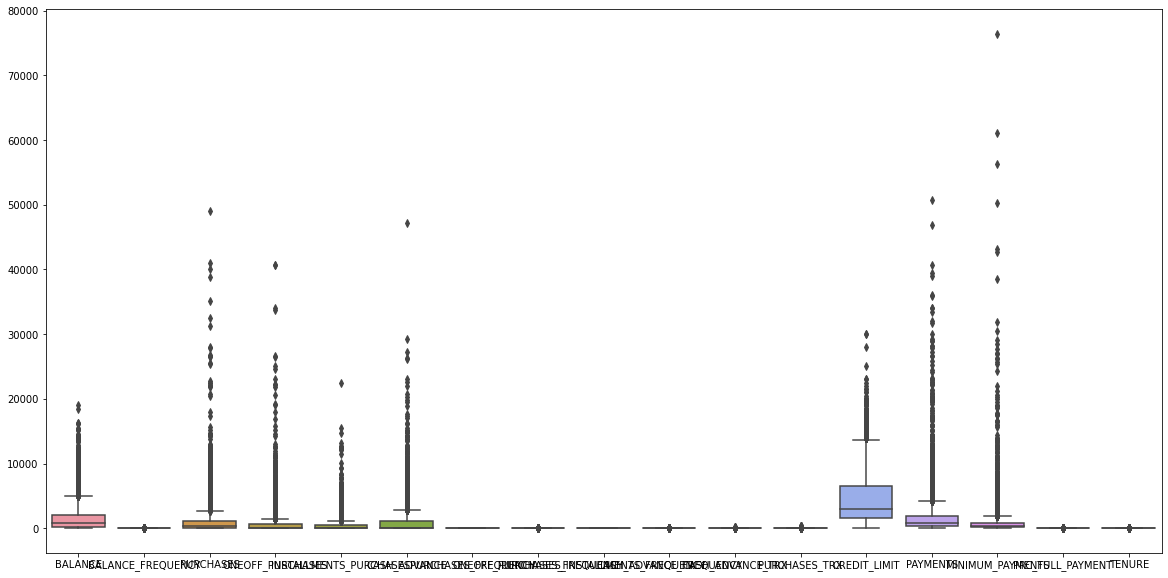

In [ ]:
plt.figure(figsize = (20,10) )
sns.boxplot(data = Gen_df)